In [1]:
import pandas as pd
import numpy as np
import pandas_datareader
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
estimation_startdate = datetime(2020,6,11)
estimation_enddate = datetime(2020,12,8)

# 'FTSE 100', 'NASDAQ-100', 'S&P 500', 'CAC 40', 'DAX',
#           'Nikkei 225','Hang Seng Index',  'Shanghai Composite Index', 'S&P/ASX 200', 'S&P BSE SENSEX ',
#           'S&P/TSX Composite Index', 'STI Index', 'ESTX 50 PR.EUR','Russell 2000', 'FTSE MIB Index',
#           'S&P/ASX 50', 'Nifty 50', 'OMX Stockholm 30', 'PSI 20', 'Dow Jones Industrial Average',
#           'iShares MSCI World Index ETF', 'KOSPI Composite Index', 'OMX Copenhagen 25', 'TSEC weighted index', 
#            'S&P/NZX 50 INDEX GROSS', 'STXE 600 PR.EUR','BIST 100',
#            'iShares MSCI World Small Cap UCITS ETF ', 'MSCI AC Asia Pacific EX Japan Index FAM Fund Class I EUR Accumulation ',
#             'Vanguard FTSE Developed Europe ex-U.K. Equity Index Fund GBP Acc'

tickers = ['IMOEX.ME','^FTSE','^FCHI','DAX', 'ENY=F', '^HSI', '000001.SS','^AXJO', '^BSESN', 
           '^GSPTSE', '^STI', '^STOXX50E', '^RUT', 'FTSEMIB.MI', '^AFLI', '^NSEI','^OMX',
           'PSI20.LS', '^DJI', 'XWD.TO','^KS11','^OMXC25','^TWII','^NZ50', '^STOXX',
           'XU100.IS', 'WSML.L', '0P0001GY56.F', 'IEUR',  '0P0000KSP8.L']
marketPrices = pdr.get_data_yahoo(tickers, start = estimation_startdate, end = estimation_enddate)["Adj Close"]

[*********************100%***********************]  30 of 30 completed


In [3]:
marketPrices.head(10)

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^KS11,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-11,2920.896973,25953.519531,98.962997,22.885281,21710.0,18807.0,37.882664,2743.800049,4356.080078,4.75550,...,2176.780029,9902.000000,11154.929688,1609.060059,1318.709961,1356.219971,2704.209961,353.070007,3144.570068,11535.769531
2020-06-12,2919.740967,25863.500000,99.253998,23.111238,22150.0,18888.0,38.585361,NaN,4359.990234,4.69650,...,2132.300049,9972.900391,10905.940430,1609.069946,1320.500000,1387.680054,2684.629883,354.059998,3153.739990,11429.940430
2020-06-15,2890.030029,25829.519531,96.971001,23.428486,21920.0,18969.0,38.946228,2719.060059,4326.779785,4.73825,...,2030.819946,9813.700195,10864.120117,1616.140015,1316.959961,1419.609985,2613.879883,353.089996,3136.399902,11306.259766
2020-06-16,2931.750000,26459.050781,99.992996,23.870466,22350.0,19626.0,39.384747,2748.300049,4432.270020,4.89100,...,2138.050049,9914.000000,10953.849609,1671.839966,1336.680054,1452.260010,2666.850098,363.329987,3242.649902,11511.639648
2020-06-17,2935.870117,26730.359375,100.750000,23.703253,22460.0,19586.0,39.457840,2740.100098,4450.470215,4.87825,...,2141.050049,9881.150391,11334.309570,1677.530029,1357.670044,1426.530029,2669.620117,366.019989,3267.260010,11534.589844
2020-06-18,2939.320068,26850.769531,100.806999,23.592081,22350.0,19486.0,39.183758,2724.330078,4428.240234,4.86400,...,2133.479980,10091.650391,11225.280273,1667.930054,1347.589966,1427.329956,2665.659912,363.410004,3249.899902,11548.330078
2020-06-19,2967.629883,27014.220703,101.589996,23.377872,22290.0,19619.0,39.019314,2758.669922,4461.270020,4.88525,...,2141.320068,10244.400391,11254.740234,NaN,NaN,1418.630005,2634.830078,365.459991,3269.100098,11549.860352
2020-06-22,2965.271973,26782.349609,100.967003,23.716810,22550.0,19479.0,39.457840,2763.290039,4414.200195,4.84250,...,2126.729980,10311.200195,11158.459961,1657.709961,1356.640015,1433.530029,2629.689941,362.700012,3241.689941,11572.929688
2020-06-23,2970.620117,27194.269531,NaN,24.119024,22510.0,19842.0,39.759323,2791.969971,4449.680176,4.90950,...,2131.239990,10471.000000,11132.580078,1683.359985,1379.300049,1439.339966,2634.919922,367.399994,3298.830078,11612.360352


In [4]:
marketReturns  = marketPrices.pct_change(1).dropna()
#marketReturns = np.where(int(marketReturns) == 0, )
marketReturns.head()

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^KS11,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-12,-0.000396,-0.003468,0.002940,0.009874,0.020267,0.004307,0.018549,0.000000,0.000898,-0.012407,...,-0.020434,0.007160,-0.022321,0.000006,0.001357,0.023197,-0.007241,0.002804,0.002916,-0.009174
2020-06-15,-0.010176,-0.001314,-0.023002,0.013727,-0.010384,0.004288,0.009352,-0.009017,-0.007617,0.008890,...,-0.047592,-0.015963,-0.003835,0.004394,-0.002681,0.023010,-0.026354,-0.002740,-0.005498,-0.010821
2020-06-16,0.014436,0.024373,0.031164,0.018865,0.019617,0.034635,0.011260,0.010754,0.024381,0.032238,...,0.052801,0.010220,0.008259,0.034465,0.014974,0.022999,0.020265,0.029001,0.033876,0.018165
2020-06-17,0.001405,0.010254,0.007571,-0.007005,0.004922,-0.002038,0.001856,-0.002984,0.004106,-0.002607,...,0.001403,-0.003313,0.034733,0.003403,0.015703,-0.017717,0.001039,0.007404,0.007590,0.001994
2020-06-18,0.001175,0.004505,0.000566,-0.004690,-0.004898,-0.005106,-0.006946,-0.005755,-0.004995,-0.002921,...,-0.003536,0.021303,-0.009619,-0.005723,-0.007425,0.000561,-0.001483,-0.007131,-0.005313,0.001191


In [5]:
marketReturns["whole market"] = marketReturns.mean(axis = 1)
marketReturns.head(10)

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII,whole market
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-12,-0.000396,-0.003468,0.002940,0.009874,0.020267,0.004307,0.018549,0.000000,0.000898,-0.012407,...,0.007160,-0.022321,0.000006,0.001357,0.023197,-0.007241,0.002804,0.002916,-0.009174,0.001454
2020-06-15,-0.010176,-0.001314,-0.023002,0.013727,-0.010384,0.004288,0.009352,-0.009017,-0.007617,0.008890,...,-0.015963,-0.003835,0.004394,-0.002681,0.023010,-0.026354,-0.002740,-0.005498,-0.010821,-0.005647
2020-06-16,0.014436,0.024373,0.031164,0.018865,0.019617,0.034635,0.011260,0.010754,0.024381,0.032238,...,0.010220,0.008259,0.034465,0.014974,0.022999,0.020265,0.029001,0.033876,0.018165,0.022371
2020-06-17,0.001405,0.010254,0.007571,-0.007005,0.004922,-0.002038,0.001856,-0.002984,0.004106,-0.002607,...,-0.003313,0.034733,0.003403,0.015703,-0.017717,0.001039,0.007404,0.007590,0.001994,0.002834
2020-06-18,0.001175,0.004505,0.000566,-0.004690,-0.004898,-0.005106,-0.006946,-0.005755,-0.004995,-0.002921,...,0.021303,-0.009619,-0.005723,-0.007425,0.000561,-0.001483,-0.007131,-0.005313,0.001191,-0.001296
2020-06-19,0.009631,0.006087,0.007767,-0.009080,-0.002685,0.006825,-0.004197,0.012605,0.007459,0.004369,...,0.015136,0.002624,0.000000,0.000000,-0.006095,-0.011566,0.005641,0.005908,0.000133,0.002946
2020-06-22,-0.000795,-0.008583,-0.006132,0.014498,0.011664,-0.007136,0.011239,0.001675,-0.010551,-0.008751,...,0.006521,-0.008555,-0.006127,0.006716,0.010503,-0.001951,-0.007552,-0.008385,0.001997,-0.000138
2020-06-23,0.001804,0.015380,0.000000,0.016959,-0.001774,0.018635,0.007641,0.010379,0.008038,0.013836,...,0.015498,-0.002319,0.015473,0.016703,0.004053,0.001989,0.012958,0.017627,0.003407,0.008457
2020-06-24,0.003006,-0.025886,0.010251,-0.026794,-0.012439,-0.034220,-0.026425,0.000000,-0.017475,-0.032539,...,-0.015825,0.011393,-0.024029,-0.017545,-0.034460,-0.002391,-0.027844,-0.031135,0.004160,-0.014610


In [6]:
Beta = {}
var = marketReturns["whole market"].var()
for col in marketReturns:
    cov = marketReturns[col].cov(marketReturns["whole market"])
    Beta[col] = cov/var
Beta

{'000001.SS': 0.471543511934778,
 '0P0000KSP8.L': 1.0847928171444858,
 '0P0001GY56.F': 0.6621137385973266,
 'DAX': 1.3033738206135939,
 'ENY=F': 0.7583501461721831,
 'FTSEMIB.MI': 1.4606942996057812,
 'IEUR': 1.0479824446761556,
 'IMOEX.ME': 0.7418363002811442,
 'PSI20.LS': 0.9940539578212033,
 'WSML.L': 1.2067468187381565,
 'XU100.IS': 4.456835999455167,
 'XWD.TO': 0.5970454369648484,
 '^AFLI': 0.5820777093579462,
 '^AXJO': 0.5831970544315631,
 '^BSESN': 0.685502430902586,
 '^DJI': 0.9133268432119885,
 '^FCHI': 1.4411655548643216,
 '^FTSE': 1.2435253687629646,
 '^GSPTSE': 0.5704260401497178,
 '^HSI': 0.8808186132836754,
 '^KS11': 0.7581830167900431,
 '^NSEI': 0.6801128571083213,
 '^NZ50': 0.33024305019748246,
 '^OMX': 1.1027685864426484,
 '^OMXC25': 0.6872755717087459,
 '^RUT': 1.1036440196865123,
 '^STI': 0.6445686251678593,
 '^STOXX': 1.1912969538712581,
 '^STOXX50E': 1.45026291839043,
 '^TWII': 0.3662354936671101,
 'whole market': 1.0000000000000002}

In [7]:
event_startdate = datetime(2020,12,8)
event_enddate = datetime(2020,12,21)
eventPrices = pdr.get_data_yahoo(tickers, start = event_startdate, end = event_enddate)["Adj Close"]
eventPrices

[*********************100%***********************]  30 of 30 completed


,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^KS11,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-08,3410.179932,29593.089844,117.942001,27.565039,26570.0,22053.0,46.592953,3179.610107,4759.109863,6.1870,...,2700.929932,13392.950195,12719.589844,1925.500000,1579.640015,1917.780029,2825.629883,393.640015,3525.870117,14360.400391
2020-12-09,3371.964111,29512.230469,118.750999,27.542179,26690.0,21970.0,46.574684,3211.659912,4774.189941,6.2185,...,2755.469971,13529.099609,12889.400391,1926.420044,1588.939941,1902.150024,2843.070068,394.899994,3529.020020,14390.139648
2020-12-10,3373.275879,29819.330078,117.967003,27.747890,26710.0,21916.0,46.529007,3258.310059,4795.470215,6.1930,...,2746.459961,13478.299805,12860.370117,1906.819946,1576.910034,1922.699951,2824.959961,393.149994,3522.310059,14249.490234
2020-12-11,3347.190918,29703.140625,118.372002,27.281616,26540.0,21702.0,46.227516,3276.580078,4742.669922,6.1760,...,2770.060059,13513.849609,12919.250000,1891.219971,1581.969971,1911.699951,2821.699951,390.119995,3485.840088,14261.690430
2020-12-14,3369.120117,29631.500000,117.723999,27.555895,26660.0,21760.0,46.252434,3254.830078,4780.029785,6.2260,...,2762.199951,13558.150391,12835.120117,1890.650024,1600.270020,1913.859985,2858.139893,391.850006,3503.959961,14211.049805
2020-12-15,3367.229980,29604.140625,117.154999,27.971884,26760.0,21935.0,46.879833,3248.110107,4775.919922,6.2500,...,2756.820068,13567.849609,12767.169922,1889.839966,1595.310059,1959.760010,2856.719971,392.839996,3521.500000,14068.519531
2020-12-16,3366.982910,29676.750000,118.160004,28.393360,26760.0,21987.0,47.119720,3269.949951,4796.080078,6.2950,...,2771.790039,13682.700195,12828.990234,1892.260010,1612.619995,1952.719971,2872.800049,396.079987,3543.000000,14304.459961
2020-12-17,3404.873047,29722.349609,118.403000,28.799290,26750.0,22012.0,47.479557,3282.669922,4825.529785,6.3490,...,2770.429932,13740.700195,12888.769531,1885.180054,1618.410034,1978.050049,2858.020020,397.279999,3560.870117,14258.929688
2020-12-18,3394.899902,29900.560547,117.927002,28.593580,26710.0,21976.0,47.258118,3273.750000,4763.029785,6.3720,...,2772.179932,13760.549805,12682.000000,1886.880005,1643.839966,1969.989990,2848.979980,395.899994,3545.739990,14249.959961


In [8]:
eventReturns = eventPrices.pct_change(1).dropna().iloc[1:]
eventReturns["whole market"] = eventReturns.mean(axis = 1)
eventReturns

,000001.SS,0P0000KSP8.L,0P0001GY56.F,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,...,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII,whole market
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-10,0.000389,0.010406,-0.006602,0.007469,0.000749,-0.002458,-0.000981,0.014525,0.004457,-0.004101,...,-0.003755,-0.002252,-0.010174,-0.007571,0.010804,-0.006370,-0.004432,-0.001901,-0.009774,-0.001083
2020-12-11,-0.007733,-0.003896,0.003433,-0.016804,-0.006365,-0.009765,-0.006480,0.005607,-0.011010,-0.002745,...,0.002638,0.004578,-0.008181,0.003209,-0.005721,-0.001154,-0.007707,-0.010354,0.000856,-0.002674
2020-12-14,0.006552,-0.002412,-0.005474,0.010054,0.004521,0.002673,0.000539,-0.006638,0.007877,0.008096,...,0.003278,-0.006512,-0.000301,0.011568,0.001130,0.012914,0.004435,0.005198,-0.003551,0.001635
2020-12-15,-0.000561,-0.000923,-0.004833,0.015096,0.003751,0.008042,0.013565,-0.002065,-0.000860,0.003855,...,0.000715,-0.005294,-0.000428,-0.003099,0.023983,-0.000497,0.002526,0.005006,-0.010030,0.001972
2020-12-16,-0.000073,0.002453,0.008578,0.015068,0.000000,0.002371,0.005117,0.006724,0.004221,0.007200,...,0.008465,0.004842,0.001281,0.010851,-0.003592,0.005629,0.008248,0.006105,0.016771,0.005488
2020-12-17,0.011253,0.001537,0.002057,0.014297,-0.000374,0.001137,0.007637,0.003890,0.006140,0.008578,...,0.004239,0.004660,-0.003742,0.003590,0.012972,-0.005145,0.003030,0.005044,-0.003183,0.004300
2020-12-18,-0.002929,0.005996,-0.004020,-0.007143,-0.001495,-0.001635,-0.004664,-0.002717,-0.012952,0.003623,...,0.001445,-0.016043,0.000902,0.015713,-0.004075,-0.003163,-0.003474,-0.004249,-0.000629,-0.002712


In [9]:
non_risk_insterest_rate = 0.0388

abnormalReturns = pd.DataFrame()

for col in marketReturns:
    if col != '0P0001GY56.F':
        abnormalReturns[col] = non_risk_insterest_rate + Beta[col]*(eventReturns[col] - non_risk_insterest_rate) - eventReturns[col]

abnormalReturns

,000001.SS,0P0000KSP8.L,DAX,ENY=F,FTSEMIB.MI,IEUR,IMOEX.ME,PSI20.LS,WSML.L,XU100.IS,...,^NSEI,^NZ50,^OMX,^OMXC25,^RUT,^STI,^STOXX,^STOXX50E,^TWII,whole market
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-10,0.020299,-0.002408,-0.009505,0.009195,-0.019007,-0.001909,0.006267,0.000204,-0.008870,-0.126189,...,0.013613,0.027495,-0.005033,0.014501,-0.002902,0.016055,-0.008270,-0.018326,0.030784,-4.987330e-18
2020-12-11,0.024591,-0.003620,-0.016869,0.010914,-0.022373,-0.002173,0.008569,0.000296,-0.008589,-0.089938,...,0.011568,0.022920,-0.004828,0.011130,-0.004614,0.014201,-0.008897,-0.022132,0.024047,-6.505213e-18
2020-12-14,0.017042,-0.003494,-0.008721,0.008283,-0.016644,-0.001836,0.011730,0.000184,-0.006348,-0.088982,...,0.011363,0.030348,-0.004018,0.008516,-0.003904,0.009201,-0.006574,-0.015130,0.026840,-8.890458e-18
2020-12-15,0.020801,-0.003368,-0.007191,0.008470,-0.014170,-0.001211,0.010550,0.000236,-0.007225,-0.117197,...,0.012183,0.029532,-0.004031,0.013103,-0.001536,0.013967,-0.006939,-0.015216,0.030946,-6.071532e-18
2020-12-16,0.020543,-0.003082,-0.007200,0.009376,-0.016783,-0.001616,0.008281,0.000206,-0.006533,-0.141309,...,0.009704,0.022744,-0.003856,0.008740,-0.004394,0.011790,-0.005845,-0.014721,0.013961,-8.673617e-18
2020-12-17,0.014557,-0.003160,-0.007434,0.009466,-0.017351,-0.001495,0.009013,0.000194,-0.006248,-0.116996,...,0.011056,0.022866,-0.004372,0.011011,-0.002677,0.015619,-0.006843,-0.015199,0.026607,-7.806256e-18
2020-12-18,0.022052,-0.002782,-0.013938,0.009737,-0.018628,-0.002086,0.010718,0.000308,-0.007273,-0.112140,...,0.011950,0.036731,-0.003895,0.007220,-0.004444,0.014915,-0.008087,-0.019383,0.024989,-5.204170e-18


In [10]:
all_AR = pd.DataFrame(abnormalReturns.mean(axis = 1)/len(tickers))
all_AR.columns = ['AAR']
all_AR

,AAR
Date,
2020-12-10,0.000016
2020-12-11,0.000011
2020-12-14,0.000046
2020-12-15,0.000030
2020-12-16,-0.000048
2020-12-17,-0.000011
2020-12-18,0.000027


In [11]:
CAR_list = [0 for i in range(len(all_AR))]
for i in range(len(all_AR)):
    for j in range(i,len(all_AR)):
        CAR_list[j] += all_AR.iloc[i]["AAR"]
all_AR["CAR"] = CAR_list
all_AR

,AAR,CAR
Date,,
2020-12-10,0.000016,0.000016
2020-12-11,0.000011,0.000027
2020-12-14,0.000046,0.000073
2020-12-15,0.000030,0.000103
2020-12-16,-0.000048,0.000055
2020-12-17,-0.000011,0.000043
2020-12-18,0.000027,0.000071


# whole market

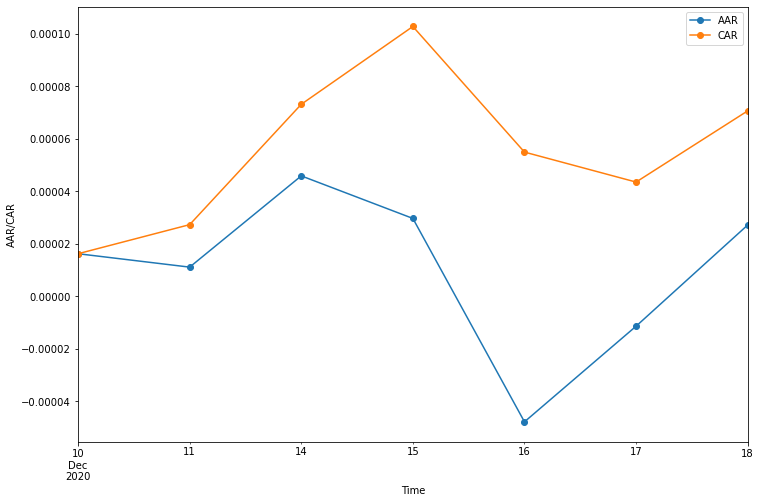

In [12]:
all_AR.plot(figsize = (12,8), marker = 'o')
plt.xlabel("Time")
plt.ylabel("AAR/CAR")
plt.show()

# T-test

In [13]:
t = (abnormalReturns.mean(axis = 1)) / abnormalReturns.std(axis = 1)
t

Date
2020-12-10    0.017729
2020-12-11    0.015131
2020-12-14    0.065426
2020-12-15    0.034766
2020-12-16   -0.050474
2020-12-17   -0.013826
2020-12-18    0.031789
dtype: float64

In [14]:
all_AR["CAR"]/(np.sqrt(len(tickers))*abnormalReturns.std(axis = 1))

Date
2020-12-10    0.000108
2020-12-11    0.000227
2020-12-14    0.000635
2020-12-15    0.000734
2020-12-16    0.000352
2020-12-17    0.000320
2020-12-18    0.000504
dtype: float64